In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-label/multi_outdoor_2_faulty_label_2.csv
/kaggle/input/dataset-label/multi_outdoor_1_faulty_label_1.csv
/kaggle/input/dataset-label/multi_indoor_4_faulty_label_4.csv
/kaggle/input/dataset-label/multi_indoor_3_faulty_label_3.csv
/kaggle/input/dataset/multi_outdoor_1_clean.csv
/kaggle/input/dataset/multi_outdoor_2_faulty_label_2.csv
/kaggle/input/dataset/single_outdoor_3_faulty.csv
/kaggle/input/dataset/multi_indoor_4_faulty.csv
/kaggle/input/dataset/single_outdoor_4_faulty.csv
/kaggle/input/dataset/single_indoor_2_clean.csv
/kaggle/input/dataset/single_outdoor_3_clean.csv
/kaggle/input/dataset/single_outdoor_4_clean.csv
/kaggle/input/dataset/single_indoor_1_faulty.csv
/kaggle/input/dataset/multi_outdoor_2_clean.csv
/kaggle/input/dataset/multi_indoor_4_clean.csv
/kaggle/input/dataset/multi_outdoor_1_faulty_label_1.csv
/kaggle/input/dataset/single_indoor_2_faulty.csv
/kaggle/input/dataset/single_indoor_1_clean.csv
/kaggle/input/dataset/multi_indoor_4_faulty_label_4.c

Load Libraries

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

-Load data and load CSV file

In [22]:

dfmf1 = pd.read_csv("/kaggle/input/dataset/multi_outdoor_1_faulty.csv") #1
dfmf2 = pd.read_csv("/kaggle/input/dataset/multi_outdoor_2_faulty.csv") #2
dfmf3 = pd.read_csv("/kaggle/input/dataset/multi_indoor_3_faulty.csv") #3
dfmf4 = pd.read_csv("/kaggle/input/dataset/multi_indoor_4_faulty.csv") #4



- Merge single node data together and multi node data together

In [23]:
#Drop NaN values
for dataFrame in (dfmf1,
                    dfmf2,
                    dfmf3,
                    dfmf4 ):
    dataFrame.columns=['Humidity', 'Temprature' , 'Label']

    
#mc1,mc3 mf1 mf3
#dfmc1 = dfmc1.apply (pd.to_numeric, errors='coerce')
#dfmc1 = dfmc1.dropna()

#dfmc3 = dfmc3.apply (pd.to_numeric, errors='coerce')
#dfmc3 = dfmc3.dropna()

dfmf1 = dfmf1.apply (pd.to_numeric, errors='coerce')
dfmf1 = dfmf1.dropna()

dfmf3 = dfmf3.apply (pd.to_numeric, errors='coerce')
dfmf3 = dfmf3.dropna()


combined1 =[ dfmf1.reset_index(drop=True),
             dfmf2.reset_index(drop=True),
             dfmf3.reset_index(drop=True),
             dfmf4.reset_index(drop=True)]
result_com1 = pd.concat(combined1)
print('Combined Single and multi Hop:\n', result_com1)

print(len(result_com1))


Combined Single and multi Hop:
       Humidity  Temprature  Label
0        30.20       43.79    0.0
1        30.19       43.79    0.0
2        30.19       43.79    0.0
3        30.19       43.79    0.0
4        30.19       43.79    0.0
...        ...         ...    ...
4684     27.22       47.73    0.0
4685     27.21       47.73    0.0
4686     27.22       47.77    0.0
4687     27.21       47.73    0.0
4688     27.21       47.77    0.0

[18756 rows x 3 columns]
18756


In [24]:
r = result_com1.reset_index()
result_com1= r.iloc[:,1:]
result_com1

,Humidity,Temprature,Label
0,30.20,43.79,0.0
1,30.19,43.79,0.0
2,30.19,43.79,0.0
3,30.19,43.79,0.0
4,30.19,43.79,0.0
...,...,...,...
18751,27.22,47.73,0.0
18752,27.21,47.73,0.0
18753,27.22,47.77,0.0
18754,27.21,47.73,0.0


In [25]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
## Normalisation

result_com1.rename(columns={ 0:'Humidity'
                            , 1:'Temprature'
                            , 2:'Label'}, 
                 inplace=True)


In [26]:
Normalised_S = result_com1.iloc[:, :-1]
Normalised_Single = preprocessing.normalize(Normalised_S)
Normalised_S_data = pd.DataFrame(Normalised_Single)
print('Normalised data for Single and multi hop:\n',Normalised_S_data)
print(Normalised_S_data.shape)
#Normalised_S_data

Normalised data for Single and multi hop:
               0         1
0      0.567733  0.823213
1      0.567606  0.823301
2      0.567606  0.823301
3      0.567606  0.823301
4      0.567606  0.823301
...         ...       ...
18751  0.495394  0.868668
18752  0.495257  0.868747
18753  0.495081  0.868847
18754  0.495257  0.868747
18755  0.494944  0.868925

[18756 rows x 2 columns]
(18756, 2)


In [27]:
Normalised_S_labels = result_com1.iloc[:, 2]
Normalised_S_labels

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18751    0.0
18752    0.0
18753    0.0
18754    0.0
18755    0.0
Name: Label, Length: 18756, dtype: float64

In [28]:
len(Normalised_S_data)

18756

#### Divide the data into training and testing part, here we are taking 80% training and 20% testing

In [29]:
from sklearn.model_selection import train_test_split

tr_data, ts_data, tr_label, ts_label = train_test_split(Normalised_S_data, Normalised_S_labels, test_size = 0.2, random_state = 42)

In [30]:
len(tr_data)
#type(tr_data)

15004

In [31]:
len(ts_data)

3752

In [32]:
len(tr_label)

15004

In [33]:
len(ts_label)

3752

## SVM classifier

In [34]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
results = []
names = []


tr_data_arr = np.array(tr_data)

tr_label_arr = np.array(tr_label)

from sklearn.svm import SVC

clf = SVC(C = 20, kernel='rbf',random_state=42)
clf.fit(tr_data_arr, tr_label_arr)
prediction = clf.predict(np.array(ts_data))
print(prediction)

[0. 3. 0. ... 0. 0. 0.]


In [115]:
from sklearn.metrics import accuracy_score

Accuracy = accuracy_score(prediction, ts_label)
print('Accuracy with SVM classifier:\n',Accuracy*100)



print('confusion_matrix:\n', confusion_matrix(ts_label, prediction))
print('Classification Report')
print(classification_report(ts_label, prediction))

names.append('SVM')
results.append(Accuracy*100)

Accuracy with SVM classifier:
 61.833688699360344
confusion_matrix:
 [[1814    0    0    0    0]
 [   2    0    0    4    0]
 [ 555    0    0    4   25]
 [  84    0    0  479    0]
 [ 651    0    0  107   27]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.58      1.00      0.74      1814
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00       584
         3.0       0.81      0.85      0.83       563
         4.0       0.52      0.03      0.06       785

    accuracy                           0.62      3752
   macro avg       0.38      0.38      0.33      3752
weighted avg       0.51      0.62      0.49      3752



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## RandomForestClassifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(bootstrap=True, class_weight=None,
                             max_depth=30, max_features='auto', max_leaf_nodes=None,
                             min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=50, n_jobs=1,
                             oob_score=False, random_state=42,verbose=0, warm_start=False)

clf.fit(tr_data_arr, tr_label_arr)
#RandomForestClassifier(...)
prediction = (clf.predict(np.array(ts_data)))
print(prediction)
          
Accuracy = accuracy_score(prediction, ts_label)
print('Accuracy with RandomForestClassifier classifier:\n',Accuracy*100)
print('confusion_matrix:\n', confusion_matrix(ts_label, prediction))
print('Classification Report')
print(classification_report(ts_label, prediction))
names.append('RandomForestClassifier')
results.append(Accuracy*100)



[4. 3. 3. ... 0. 0. 0.]
Accuracy with RandomForestClassifier classifier:
 84.00852878464818
confusion_matrix:
 [[1552    0  167   13   82]
 [   0    3    1    2    0]
 [ 178    2  340    8   56]
 [  15    1    6  538    3]
 [  41    0   21    4  719]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1814
         1.0       0.50      0.50      0.50         6
         2.0       0.64      0.58      0.61       584
         3.0       0.95      0.96      0.95       563
         4.0       0.84      0.92      0.87       785

    accuracy                           0.84      3752
   macro avg       0.76      0.76      0.76      3752
weighted avg       0.84      0.84      0.84      3752



## XGBoost

In [38]:

#Multiclass classification

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
import xgboost as xgb

clf = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
clf.fit(tr_data_arr, tr_label_arr)
#RandomForestClassifier(...)
prediction = (clf.predict(np.array(ts_data)))
print(prediction)
          
Accuracy = accuracy_score(prediction, ts_label)
print('Accuracy with XGBoost classifier:\n',Accuracy*100)

print('confusion_matrix:\n', confusion_matrix(ts_label, prediction))
print('Classification Report')
print(classification_report(ts_label, prediction))

names.append('XGBoost')
results.append(Accuracy*100)


[4. 3. 3. ... 0. 0. 0.]
Accuracy with XGBoost classifier:
 79.93070362473348
confusion_matrix:
 [[1630    0   62   16  106]
 [   1    2    1    2    0]
 [ 323    2  158    5   96]
 [  16    1    3  538    5]
 [  99    0    9    6  671]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1814
         1.0       0.40      0.33      0.36         6
         2.0       0.68      0.27      0.39       584
         3.0       0.95      0.96      0.95       563
         4.0       0.76      0.85      0.81       785

    accuracy                           0.80      3752
   macro avg       0.72      0.66      0.67      3752
weighted avg       0.79      0.80      0.78      3752



## GradientBoostingClassifier

In [39]:
from sklearn.ensemble import  GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators = 150 , random_state = 42 )
clf.fit(tr_data_arr, tr_label_arr)
prediction = (clf.predict(np.array(ts_data)))
print(prediction)
          
Accuracy = accuracy_score(prediction, ts_label)
print('Accuracy with GradientBoostingClassifier classifier:\n',Accuracy*100)

print('confusion_matrix:\n', confusion_matrix(ts_label, prediction))
print('Classification Report')
print(classification_report(ts_label, prediction))

names.append('GradientBoostingClassifier')
results.append(Accuracy*100)


[4. 3. 3. ... 0. 0. 0.]
Accuracy with GradientBoostingClassifier classifier:
 78.06503198294243
confusion_matrix:
 [[1605    0   65   12  132]
 [   2    3    0    1    0]
 [ 333    2  132    5  112]
 [  24    1    1  534    3]
 [ 111    0    9   10  655]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.83      1814
         1.0       0.50      0.50      0.50         6
         2.0       0.64      0.23      0.33       584
         3.0       0.95      0.95      0.95       563
         4.0       0.73      0.83      0.78       785

    accuracy                           0.78      3752
   macro avg       0.72      0.68      0.68      3752
weighted avg       0.77      0.78      0.76      3752



## KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
clf.fit(tr_data_arr, tr_label_arr)
prediction = (clf.predict(np.array(ts_data)))
print(prediction)
          
Accuracy = accuracy_score(prediction, ts_label)
print('Accuracy with KNN classifier:\n',Accuracy*100)

print('confusion_matrix:\n', confusion_matrix(ts_label, prediction))
print('Classification Report')
print(classification_report(ts_label, prediction))

names.append('KNN')
results.append(Accuracy*100)


[4. 3. 3. ... 0. 0. 0.]
Accuracy with KNN classifier:
 84.27505330490405
confusion_matrix:
 [[1557    0  167   13   77]
 [   0    3    1    2    0]
 [ 175    2  344    8   55]
 [  13    1    6  540    3]
 [  41    0   22    4  718]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1814
         1.0       0.50      0.50      0.50         6
         2.0       0.64      0.59      0.61       584
         3.0       0.95      0.96      0.96       563
         4.0       0.84      0.91      0.88       785

    accuracy                           0.84      3752
   macro avg       0.76      0.76      0.76      3752
weighted avg       0.84      0.84      0.84      3752



## DecisionTreeClassifier

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 48 , random_state = 42 )
clf.fit(tr_data_arr, tr_label_arr)
prediction = (clf.predict(np.array(ts_data)))
print(prediction)
          
Accuracy = accuracy_score(prediction, ts_label)
print('Accuracy with DecisionTreeClassifier classifier:\n',Accuracy*100)

print('confusion_matrix:\n', confusion_matrix(ts_label, prediction))
print('Classification Report')
print(classification_report(ts_label, prediction))

names.append('DecisionTreeClassifier')
results.append(Accuracy*100)




[4. 3. 3. ... 0. 0. 0.]
Accuracy with DecisionTreeClassifier classifier:
 84.1684434968017
confusion_matrix:
 [[1554    0  168   13   79]
 [   0    3    1    2    0]
 [ 176    2  343    8   55]
 [  13    1    6  540    3]
 [  41    0   22    4  718]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1814
         1.0       0.50      0.50      0.50         6
         2.0       0.64      0.59      0.61       584
         3.0       0.95      0.96      0.96       563
         4.0       0.84      0.91      0.88       785

    accuracy                           0.84      3752
   macro avg       0.76      0.76      0.76      3752
weighted avg       0.84      0.84      0.84      3752



## Plot the Graphs

In [42]:
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

name_df = pd.DataFrame(names) 
result_df = pd.DataFrame(results) 

name_df['Accuracy'] = result_df
name_df.rename(columns={ 0: 'Algorithm'
                   ,}, 
                 inplace=True)

print(name_df)
#print(result_df)


fig = px.line(name_df,  x='Algorithm', y='Accuracy')
fig.update_layout(yaxis_range = [0.00, 100.00],
                  title_text="Algorithm Comparison")
fig.show()



                    Algorithm   Accuracy
0                         SVM  61.833689
1      RandomForestClassifier  84.008529
2                     XGBoost  79.930704
3  GradientBoostingClassifier  78.065032
4                         KNN  84.275053
5      DecisionTreeClassifier  84.168443


## Neural networks:

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.optimizers import Adam
from keras import Sequential
import random
import tensorflow
## Set Result for Reproducible Results
np.random.seed(1500)
tensorflow.random.set_seed(1500)

In [44]:
Tssdata = pd.read_csv("/kaggle/input/dataset/multi_outdoor_1_faulty.csv")
Trrdata= pd.read_csv("/kaggle/input/dataset/multi_outdoor_2_faulty.csv")


In [45]:
Data=np.concatenate((Tssdata,Trrdata),axis=0) #adding output to normalised data
Data=pd.DataFrame(Data)


In [46]:
Data.shape

(9388, 3)

In [47]:
Data

,0,1,2
0,30.200000,43.79,0.0
1,30.190000,43.79,0.0
2,30.190000,43.79,0.0
3,30.190000,43.79,0.0
4,30.190000,43.79,0.0
...,...,...,...
9383,0.279422,73.56,3.0
9384,0.279422,73.53,3.0
9385,0.427704,73.51,3.0
9386,0.427704,73.51,3.0


In [48]:
Tsdata = pd.read_csv("/kaggle/input/dataset/multi_indoor_3_faulty.csv")
Trdata= pd.read_csv("/kaggle/input/dataset/multi_indoor_4_faulty.csv")


In [49]:
Data1=np.concatenate((Tsdata,Trdata),axis=0) #adding output to normalised data
Data1=pd.DataFrame(Data1)

In [50]:
Data1

,0,1,2
0,27.61,46.82,0.0
1,27.61,46.79,0.0
2,27.63,46.69,0.0
3,27.63,46.62,0.0
4,27.64,46.56,0.0
...,...,...,...
9383,27.22,47.73,0.0
9384,27.21,47.73,0.0
9385,27.22,47.77,0.0
9386,27.21,47.73,0.0


In [51]:
Finaldata=np.concatenate((Data,Data1),axis=0) #adding output to normalised data
Finaldata=pd.DataFrame(Finaldata)

In [52]:
#remove NaN 
Finaldata = Finaldata.apply (pd.to_numeric, errors='coerce')
Finaldata = Finaldata.dropna()

In [53]:
Finaldata

,0,1,2
0,30.20,43.79,0.0
1,30.19,43.79,0.0
2,30.19,43.79,0.0
3,30.19,43.79,0.0
4,30.19,43.79,0.0
...,...,...,...
18771,27.22,47.73,0.0
18772,27.21,47.73,0.0
18773,27.22,47.77,0.0
18774,27.21,47.73,0.0


In [54]:
trainx = Finaldata.iloc[:,0:2].values
trainy = Finaldata.iloc[:,2].values

In [55]:
trainx


array([[30.2 , 43.79],
       [30.19, 43.79],
       [30.19, 43.79],
       ...,
       [27.22, 47.77],
       [27.21, 47.73],
       [27.21, 47.77]])

In [56]:
trainy

array([0., 0., 0., ..., 0., 0., 0.])

In [57]:
from sklearn.model_selection import train_test_split

tr_x, vl_x, y_train, y_test = train_test_split(trainx, trainy, test_size = 0.2, random_state = 0)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(tr_x)
X_test = sc.transform(vl_x)

In [59]:
y_train = y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train)
print(y_train)

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]]


In [60]:
X_train.shape

(15004, 2)

In [61]:
y_train.shape

(15004, 5)

In [62]:
y_test_real = y_test
y_test_real

array([0., 4., 0., ..., 0., 0., 0.])

In [63]:
y_test = y_test.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y_test = encoder.fit_transform(y_test)
print(y_test)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [64]:
from keras.layers import Dense, Conv1D, Conv2D,LSTM,Flatten, Embedding, Dropout

accuracy = []
loss = []
name = []
epochs = []


### Combination-1: RNN1 -Final test set loss: 0.542925,Final test set accuracy: 0.800640

In [65]:
model1 = Sequential()
model1.add(Dense(10, input_shape=(2,), activation='relu', name='fc1'))
model1.add(Dense(10, activation='relu', name='fc2'))
model1.add(Dense(5, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
model1.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model1.summary())

m1 = model1.fit(X_train, y_train, verbose=2, epochs=10)#, epochs=200)

results1 = model1.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results1[0]))
print('Final test set accuracy: {:4f}'.format(results1[1]))



Neural Network Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                30        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 5)                 55        
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 - 1s - loss: 1.2097 - accuracy: 0.5764
Epoch 2/10
469/469 - 1s - loss: 0.8578 - accuracy: 0.6764
Epoch 3/10
469/469 - 1s - loss: 0.7691 - accuracy: 0.7039
Epoch 4/10
469/469 - 1s - loss: 0.7205 - accuracy: 0.7080
Epoch 5/10
469/469 - 1s - loss: 0.6793 - accuracy: 0.7301
Epoch 6/10
469/469 - 1s - loss: 0.6417 - accuracy: 0.7619
Epoc

In [66]:
accuracy1 = m1.history["accuracy"]
loss1 = m1.history['loss']
name.append('RNN1')
#accuracy1.shape

acc_RNN1 = ('{:4f}'.format(results1[1]))
             
print(accuracy1)
print(loss1)
#print(acc_RNN1)

[0.576379656791687, 0.6763529777526855, 0.7039456367492676, 0.7080112099647522, 0.7301386594772339, 0.7618635296821594, 0.771594226360321, 0.7813249826431274, 0.7883231043815613, 0.7941882014274597]
[1.2097289562225342, 0.8577898144721985, 0.7691152691841125, 0.7204668521881104, 0.6793427467346191, 0.6416863203048706, 0.6092066168785095, 0.5808656811714172, 0.5590610504150391, 0.5399020910263062]


### Combination-2: RNN2 - Final test set loss: 0.644741,Final test set accuracy: 0.732676

In [67]:
model2 = Sequential()
model2.add(Dense(10, input_shape=(2,), activation='relu', name='fc1'))
model2.add(Dense(10, activation='relu', name='fc2'))
model2.add(Dense(10, activation='sigmoid'))
model2.add(Dense(5, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
model2.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model2.summary())

m2 = model2.fit(X_train, y_train, verbose=2, epochs=10)#, epochs=200)

results2 = model2.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results2[0]))
print('Final test set accuracy: {:4f}'.format(results2[1]))



Neural Network Model Summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                30        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 5)                 55        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 - 1s - loss: 1.1709 - accuracy: 0.5341
Epoch 2/10
469/469 - 1s - loss: 0.9060 - accuracy: 0.6317
Epoch 3/10
469/469 - 1s - loss: 0.8445 - accuracy: 0.6822
Epoch 4/10
469/469 - 1s - loss: 0.8023 - acc

In [68]:
accuracy2 = m2.history["accuracy"]
loss2 = m2.history['loss']
name.append('RNN2')
acc_RNN2 = ('{:4f}'.format(results2[1]))

print(accuracy2)
print(loss2)

[0.5340575575828552, 0.6316981911659241, 0.6821514368057251, 0.7038789391517639, 0.7094774842262268, 0.7142761945724487, 0.7158091068267822, 0.7198746800422668, 0.7264062762260437, 0.7325379848480225]
[1.170872688293457, 0.9059925675392151, 0.8445327877998352, 0.8023020625114441, 0.7749689221382141, 0.7527304291725159, 0.7280086278915405, 0.7001129984855652, 0.6751442551612854, 0.6528128385543823]


### Combination-3: RNN3 - Final test set loss: 0.485423,Final test set accuracy: 0.838220

In [69]:
model3 = Sequential()
model3.add(Dense(10, input_shape=(2,), activation='relu', name='fc1'))
model3.add(Dense(10, activation='relu', name='fc2'))
model3.add(Dense(10, activation='relu'))
model3.add(Dense(5, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
model3.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model3.summary())

m3 = model3.fit(X_train, y_train, verbose=2, epochs=10)#, epochs=200)

results3 = model3.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results3[0]))
print('Final test set accuracy: {:4f}'.format(results3[1]))



Neural Network Model Summary: 
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                30        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 5)                 55        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 - 1s - loss: 1.1662 - accuracy: 0.5612
Epoch 2/10
469/469 - 1s - loss: 0.8097 - accuracy: 0.6931
Epoch 3/10
469/469 - 1s - loss: 0.7366 - accuracy: 0.6927
Epoch 4/10
469/469 - 1s - loss: 0.6859 - acc

In [70]:
accuracy3 = m3.history["accuracy"]
loss3 = m3.history['loss']
name.append('RNN3')
acc_RNN3 = ('{:4f}'.format(results3[1]))

print(accuracy3)
print(loss3)

[0.5611836910247803, 0.6930818557739258, 0.6927486062049866, 0.7204079031944275, 0.7450013160705566, 0.7847240567207336, 0.8043188452720642, 0.8126499652862549, 0.8191149234771729, 0.8226472735404968]
[1.1662143468856812, 0.8096929788589478, 0.7366015911102295, 0.6858745217323303, 0.6338188648223877, 0.5904535055160522, 0.5504834055900574, 0.5185246467590332, 0.4965345859527588, 0.48120003938674927]


### Combination-4: RNN4-Final test set loss: 0.352032,Final test set accuracy: 0.875533

In [71]:
model4 = Sequential()
model4.add(Dense(10, input_shape=(2,), activation='relu', name='fc1'))
model4.add(Dense(10, activation='relu', name='fc2'))
model4.add(Dense(10, activation='relu'))
model4.add(Dense(5, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
model4.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model4.summary())

m4 = model4.fit(X_train, y_train, verbose=2, batch_size = 5, epochs=10)#, epochs=200)

results4 = model4.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results4[0]))
print('Final test set accuracy: {:4f}'.format(results4[1]))



Neural Network Model Summary: 
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 10)                30        
_________________________________________________________________
fc2 (Dense)                  (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
output (Dense)               (None, 5)                 55        
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3001/3001 - 8s - loss: 0.9106 - accuracy: 0.6466
Epoch 2/10
3001/3001 - 8s - loss: 0.6673 - accuracy: 0.7307
Epoch 3/10
3001/3001 - 7s - loss: 0.5807 - accuracy: 0.7619
Epoch 4/10
3001/3001 - 7s - loss: 0.49

In [72]:
accuracy4 = m4.history["accuracy"]
loss4 = m4.history['loss']
name.append('RNN4')

print(accuracy4)
print(loss4)
acc_RNN4 = ('{:4f}'.format(results4[1]))


[0.6465609073638916, 0.7306718230247498, 0.7618635296821594, 0.8146494030952454, 0.8302452564239502, 0.8461077213287354, 0.8576379418373108, 0.8679019212722778, 0.8762996792793274, 0.8806985020637512]
[0.9106429219245911, 0.6673066020011902, 0.5807278156280518, 0.4972146153450012, 0.4502585530281067, 0.41684213280677795, 0.3936164081096649, 0.37302365899086, 0.35636821389198303, 0.34395453333854675]


## Best Working model: RNN5

### Combination-5: RNN5  Final test set loss: 0.221637,Final test set accuracy: 0.927239 batch size 5,epochs 10

In [73]:
model5 = Sequential()
model5.add(Dense(100, input_shape=(2,), activation='relu', name='fc1'))
model5.add(Dense(100, activation='relu', name='fc2'))
model5.add(Dense(100, activation='relu'))
model5.add(Dense(5, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
model5.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model5.summary())

m5 = model5.fit(X_train, y_train, verbose=2, epochs=10, batch_size = 5)

results5 = model5.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results5[0]))
print('Final test set accuracy: {:4f}'.format(results5[1]))



Neural Network Model Summary: 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               300       
_________________________________________________________________
fc2 (Dense)                  (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 5)                 505       
Total params: 21,005
Trainable params: 21,005
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
3001/3001 - 7s - loss: 0.5610 - accuracy: 0.7877
Epoch 2/10
3001/3001 - 7s - loss: 0.3822 - accuracy: 0.8664
Epoch 3/10
3001/3001 - 7s - loss: 0.3307 - accuracy: 0.8870
Epoch 4/10
3001/3001 - 8s - loss

In [74]:
pred = model5.predict(X_test)
pred

array([[7.7100688e-01, 5.9729682e-06, 2.2897215e-01, 1.1999070e-07,
        1.4874596e-05],
       [3.5539698e-03, 1.9669773e-05, 1.4586745e-01, 1.5772939e-04,
        8.5040116e-01],
       [9.8562324e-01, 4.4506146e-06, 1.4370839e-02, 1.4568037e-06,
        7.1540024e-11],
       ...,
       [9.2982543e-01, 6.8287298e-10, 7.0174485e-02, 6.4057851e-08,
        1.6322861e-08],
       [9.5865601e-01, 5.3107615e-05, 4.0960655e-02, 3.3018476e-04,
        5.2120610e-09],
       [9.6071053e-01, 2.2328877e-06, 3.9284285e-02, 4.0779501e-08,
        3.0107426e-06]], dtype=float32)

In [75]:
predicted_labels =[]
for i in pred:
    label = np.argmax(i)
    predicted_labels.append(label)

In [76]:
#predicted_labels

In [77]:
accuracy5 = m5.history["accuracy"]
loss5 = m5.history['loss']
name.append('RNN5')

print(accuracy5)
print(loss5)

acc_RNN5 = ('{:4f}'.format(results5[1]))
var_acc_RNN5 = (results5[1]) * 100
#print(var_acc_RNN5)   

[0.7876566052436829, 0.8664355874061584, 0.8869634866714478, 0.8979605436325073, 0.9006931781768799, 0.9079578518867493, 0.9116902351379395, 0.9139562845230103, 0.9149560332298279, 0.9172220826148987]
[0.5609725713729858, 0.3821853995323181, 0.3307054936885834, 0.3023659884929657, 0.28620314598083496, 0.2659032344818115, 0.26085254549980164, 0.250454306602478, 0.24055157601833344, 0.2364519238471985]


### Confusion matrix

In [78]:
y_test_real

array([0., 4., 0., ..., 0., 0., 0.])

In [85]:

#Confution Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_test_real, predicted_labels))
print('Classification Report')
print(classification_report(y_test_real, predicted_labels))



Confusion Matrix
[[1783    0   16    0   11]
 [   1    0    3    6    0]
 [ 106    0  332   18   83]
 [   6    0    4  563    2]
 [   0    0    1   15  802]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1810
         1.0       0.00      0.00      0.00        10
         2.0       0.93      0.62      0.74       539
         3.0       0.94      0.98      0.96       575
         4.0       0.89      0.98      0.93       818

    accuracy                           0.93      3752
   macro avg       0.74      0.71      0.72      3752
weighted avg       0.93      0.93      0.92      3752



### Combination-6: RNN6 with dropout  Final test set loss: 0.263039 Final test set accuracy: 0.907782, batch size 5,epochs 10 with dropout


In [86]:
model6 = Sequential()
model6.add(Dense(100, input_shape=(2,), activation='relu', name='fc1'))
model6.add(Dropout(0.2))
model6.add(Dense(100, activation='relu', name='fc2'))
model6.add(Dropout(0.2))
model6.add(Dense(100, activation='relu'))
model6.add(Dense(5, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
model6.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary: ')
print(model6.summary())

m6 = model6.fit(X_train, y_train, verbose=2, epochs=10, batch_size = 5)

results6 = model6.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results6[0]))
print('Final test set accuracy: {:4f}'.format(results6[1]))



Neural Network Model Summary: 
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 100)               300       
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
fc2 (Dense)                  (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
output (Dense)               (None, 5)                 505       
Total params: 21,005
Trainable params: 21,005
Non-trainable params: 0
___________________

In [87]:
accuracy6 = m6.history["accuracy"]
loss6 = m6.history['loss']
name.append('RNN6')

print(accuracy6)
print(loss6)

acc_RNN6 = ('{:4f}'.format(results6[1]))


[0.7501999735832214, 0.8272460699081421, 0.8553052544593811, 0.865302562713623, 0.8759664297103882, 0.8800986409187317, 0.8884297609329224, 0.8910956978797913, 0.8912956714630127, 0.8915622234344482]
[0.6476702690124512, 0.4550755023956299, 0.40431371331214905, 0.38286200165748596, 0.3569672703742981, 0.3438739478588104, 0.32616522908210754, 0.3197823464870453, 0.30922234058380127, 0.30932191014289856]


In [88]:
#testing accuracies
testing_acc =[]
testing_acc.append(acc_RNN1) 
testing_acc.append(acc_RNN2) 
testing_acc.append(acc_RNN3)
testing_acc.append(acc_RNN4)
testing_acc.append(acc_RNN5)
testing_acc.append(acc_RNN6) 

print(testing_acc)
print(name)


['0.800640', '0.732676', '0.838220', '0.875533', '0.927505', '0.905917']
['RNN1', 'RNN2', 'RNN3', 'RNN4', 'RNN5', 'RNN6']


In [89]:
acc1 = []
acc2 = []
acc3 = []
acc4 = []
acc5 = []
acc6 = []

for i in accuracy1:
    i = i*100
    acc1.append(i)
    

for i in accuracy2:
    i = i*100
    acc2.append(i)
    
for i in accuracy3:
    i = i*100
    acc3.append(i)

for i in accuracy4:
    i = i*100
    acc4.append(i)

for i in accuracy5:
    i = i*100
    acc5.append(i)

for i in accuracy6:
    i = i*100
    acc6.append(i)

print(accuracy1)      
print(acc1)

[0.576379656791687, 0.6763529777526855, 0.7039456367492676, 0.7080112099647522, 0.7301386594772339, 0.7618635296821594, 0.771594226360321, 0.7813249826431274, 0.7883231043815613, 0.7941882014274597]
[57.6379656791687, 67.63529777526855, 70.39456367492676, 70.80112099647522, 73.01386594772339, 76.18635296821594, 77.1594226360321, 78.13249826431274, 78.83231043815613, 79.41882014274597]


## Plots

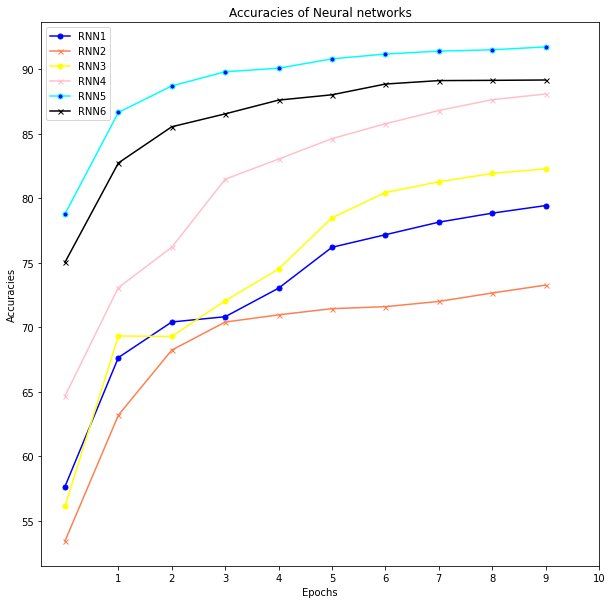

In [90]:
import matplotlib.pyplot as pyplot
#graph for accuracy
pyplot.figure(figsize= (10, 10))
pyplot.plot(acc1, color='blue', linestyle='-', marker='o', markerfacecolor='blue', markersize=5)
pyplot.plot(acc2,color='coral', linestyle='-', marker='x', markerfacecolor='coral', markersize=5)
pyplot.plot(acc3, color='yellow', linestyle='-', marker='o', markerfacecolor='yellow', markersize=5)
pyplot.plot(acc4,color='pink', linestyle='-', marker='x', markerfacecolor='pink', markersize=5)
pyplot.plot(acc5, color='aqua', linestyle='-', marker='o', markerfacecolor='blue', markersize=5)
pyplot.plot(acc6,color='black', linestyle='-', marker='x', markerfacecolor='black', markersize=5)

pyplot.title("Accuracies of Neural networks")
pyplot.legend(['RNN1','RNN2','RNN3','RNN4','RNN5','RNN6'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracies")
epochs = [1,2,3,4,5,6,7,8,9,10]
pyplot.xticks(epochs)
#pyplot.grid(color='black', linestyle='-', linewidth=0.2)
pyplot.show()

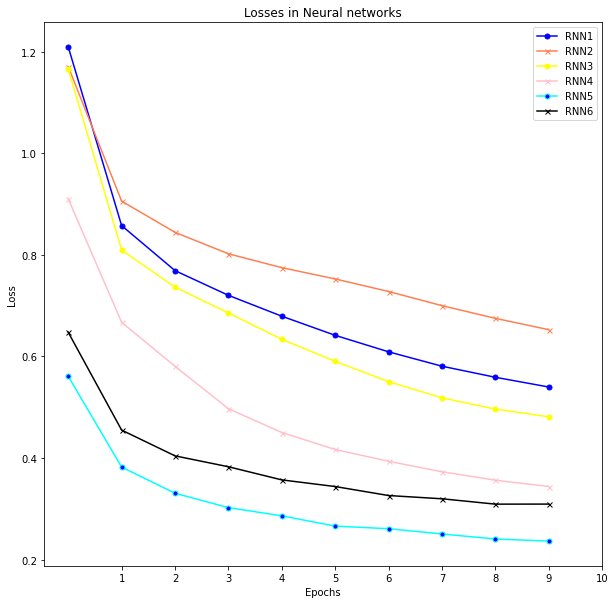

In [91]:
#graph for loss
pyplot.figure(figsize= (10, 10))
pyplot.plot(loss1, color='blue', linestyle='-', marker='o', markerfacecolor='blue', markersize=5)
pyplot.plot(loss2,color='coral', linestyle='-', marker='x', markerfacecolor='coral', markersize=5)
pyplot.plot(loss3, color='yellow', linestyle='-', marker='o', markerfacecolor='yellow', markersize=5)
pyplot.plot(loss4,color='pink', linestyle='-', marker='x', markerfacecolor='pink', markersize=5)
pyplot.plot(loss5, color='aqua', linestyle='-', marker='o', markerfacecolor='blue', markersize=5)
pyplot.plot(loss6,color='black', linestyle='-', marker='x', markerfacecolor='black', markersize=5)

pyplot.title("Losses in Neural networks")
pyplot.legend(['RNN1','RNN2','RNN3','RNN4','RNN5','RNN6'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Loss")
epochs = [1,2,3,4,5,6,7,8,9,10]
pyplot.xticks(epochs)
#pyplot.grid(color='black', linestyle='-', linewidth=0.2)
pyplot.show()

## CNN and other implementations if needed.

In [92]:
X_train.shape

(15004, 2)

In [93]:
y_train.shape

(15004, 5)

In [94]:
y_train

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

### try RNN with LSTM : not suitable for this dataset

In [95]:
###Reshape the data
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
###Reshape the data
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#
##Build the LSTM model
#model_lstm = Sequential()
#model_lstm.add(LSTM(100, return_sequences=True,input_shape = (2,1)))
#model_lstm.add(LSTM(100, return_sequences= False))
#model_lstm.add(Dense(10)) #can't use relu, sigmoid, not working
#model_lstm.add(Dense(5))
#optimizer = Adam(lr=0.001)
#model_lstm.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#
#print('Neural Network Model Summary: ')
#print(model_lstm.summary())
#
#lstm = model_lstm.fit(X_train, y_train, verbose=2, epochs=10, batch_size = 5)
#
#results_lstm = model_lstm.evaluate(X_test, y_test)
#
#print('Final test set loss: {:4f}'.format(results_lstm[0]))
#print('Final test set accuracy: {:4f}'.format(results_lstm[1]))

### try CNN : not suitable for this dataset

In [96]:

##Build the  model
#from keras.layers import Conv2D
#
#model_lstm = Sequential()
#model_lstm.add(Conv1D(32, kernel_size= 3, input_shape = (1,2)))
##model_lstm.add(LSTM(100, return_sequences=True,input_shape = (2,1)))
#model_lstm.add(Flatten())
#model_lstm.add(Dense(10)) #can't use relu, sigmoid, not working
#model_lstm.add(Dense(5))
#optimizer = Adam(lr=0.001)
#model_lstm.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#
#print('Neural Network Model Summary: ')
#print(model_lstm.summary())
#
#lstm = model_lstm.fit(X_train, y_train, verbose=2, epochs=10, batch_size = 5)
#
#results_lstm = model_lstm.evaluate(X_test, y_test)
#
#print('Final test set loss: {:4f}'.format(results_lstm[0]))
#print('Final test set accuracy: {:4f}'.format(results_lstm[1]))

### Testing accuracies and graph

## Best model identifying each fault individually

### Random Fault, Label - 1

In [97]:
l1_data = pd.read_csv("/kaggle/input/dataset-label/multi_outdoor_1_faulty_label_1.csv") 

#remove NaN 
l1_data = l1_data.apply (pd.to_numeric, errors='coerce')
l1_data = l1_data.dropna()
l1_data.shape

(4689, 3)

In [98]:
l1_trainx = l1_data.iloc[:,0:2].values
l1_trainy = l1_data.iloc[:,2].values

In [99]:
l1_tr_x, l1_vl_x, l1_y_train, l1_y_test = train_test_split(l1_trainx, l1_trainy, test_size = 0.2, random_state = 0)

In [100]:
#scale

sc = StandardScaler()
l1_X_train = sc.fit_transform(l1_tr_x)
l1_X_test = sc.transform(l1_vl_x)
l1_y_train = l1_y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l1_y_train = encoder.fit_transform(l1_y_train)
print(l1_y_train)


[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [101]:
l1_X_train.shape

(3751, 2)

In [102]:
l1_y_train.shape

(3751, 2)

In [103]:
l1_y_test = l1_y_test.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l1_y_test = encoder.fit_transform(l1_y_test)
print(l1_y_test)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [104]:
test_acc_labels = []
test_loss_labels = []
test_name_labels = []

In [105]:
l1_model5 = Sequential()
l1_model5.add(Dense(100, input_shape=(2,), activation='relu', name='fc1'))
l1_model5.add(Dense(100, activation='relu', name='fc2'))
l1_model5.add(Dense(100, activation='relu'))
l1_model5.add(Dense(2, activation='softmax', name='output'))
optimizer = Adam(lr=0.001)
l1_model5.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#print('Neural Network Model Summary: ')
#print(l1_model5.summary())


l1_m5 = l1_model5.fit(l1_X_train, l1_y_train, verbose=2, epochs=10, batch_size = 5)

l1_results5 = l1_model5.evaluate(l1_X_test, l1_y_test)

print('Final test set loss: {:4f}'.format(l1_results5[0]))
print('Final test set accuracy: {:4f}'.format(l1_results5[1]))

test_acc_labels.append((l1_results5[1])*100)
test_loss_labels.append(l1_results5[0])
test_name_labels.append('Random fault')

print('test_name_labels:',test_name_labels)
print('test_acc_labels:', test_acc_labels)
print('test_loss_labels:',test_loss_labels)

accuracy_l1 = l1_m5.history["accuracy"]
loss_l1 = l1_m5.history['loss']

Epoch 1/10
751/751 - 2s - loss: 0.0352 - accuracy: 0.9984
Epoch 2/10
751/751 - 2s - loss: 0.0136 - accuracy: 0.9984
Epoch 3/10
751/751 - 2s - loss: 0.0131 - accuracy: 0.9984
Epoch 4/10
751/751 - 2s - loss: 0.0121 - accuracy: 0.9984
Epoch 5/10
751/751 - 2s - loss: 0.0110 - accuracy: 0.9984
Epoch 6/10
751/751 - 2s - loss: 0.0124 - accuracy: 0.9984
Epoch 7/10
751/751 - 2s - loss: 0.0137 - accuracy: 0.9984
Epoch 8/10
751/751 - 2s - loss: 0.0127 - accuracy: 0.9984
Epoch 9/10
751/751 - 2s - loss: 0.0106 - accuracy: 0.9984
Epoch 10/10
751/751 - 2s - loss: 0.0119 - accuracy: 0.9984
30/30 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9979
Final test set loss: 0.008679
Final test set accuracy: 0.997868
test_name_labels: ['Random fault']
test_acc_labels: [99.78678226470947]
test_loss_labels: [0.008678745478391647]


### Malfunction Fault, Label - 2

In [106]:
l2_data = pd.read_csv("/kaggle/input/dataset-label/multi_outdoor_2_faulty_label_2.csv") 

#remove NaN 
l2_data = l2_data.apply (pd.to_numeric, errors='coerce')
l2_data = l2_data.dropna()
l2_data.shape

l2_trainx = l2_data.iloc[:,0:2].values
l2_trainy = l2_data.iloc[:,2].values


l2_tr_x, l2_vl_x, l2_y_train, l2_y_test = train_test_split(l2_trainx, l2_trainy, test_size = 0.2, random_state = 0)


#scale

sc = StandardScaler()
l2_X_train = sc.fit_transform(l2_tr_x)
l2_X_test = sc.transform(l2_vl_x)
l2_y_train = l2_y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l2_y_train = encoder.fit_transform(l2_y_train)
print(l2_y_train)

l2_X_train.shape
l2_y_train.shape

l2_y_test = l2_y_test.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l2_y_test = encoder.fit_transform(l2_y_test)
print(l2_y_test)


l2_m5 = l1_model5.fit(l2_X_train, l2_y_train, verbose=2, epochs=10, batch_size = 5)

l2_results5 = l1_model5.evaluate(l2_X_test, l2_y_test)

print('Final test set loss: {:4f}'.format(l2_results5[0]))
print('Final test set accuracy: {:4f}'.format(l2_results5[1]))

test_acc_labels.append((l2_results5[1])*100)
test_loss_labels.append(l2_results5[0])
test_name_labels.append('Malfunction fault')

print('test_name_labels:',test_name_labels)
print('test_acc_labels:', test_acc_labels)
print('test_loss_labels:',test_loss_labels)

accuracy_l2 = l2_m5.history["accuracy"]
loss_l2 = l2_m5.history['loss']

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Epoch 1/10
751/751 - 2s - loss: 0.3350 - accuracy: 0.8664
Epoch 2/10
751/751 - 2s - loss: 0.2790 - accuracy: 0.8840
Epoch 3/10
751/751 - 2s - loss: 0.2297 - accuracy: 0.9088
Epoch 4/10
751/751 - 2s - loss: 0.2013 - accuracy: 0.9184
Epoch 5/10
751/751 - 2s - loss: 0.1777 - accuracy: 0.9267
Epoch 6/10
751/751 - 2s - loss: 0.1592 - accuracy: 0.9374
Epoch 7/10
751/751 - 2s - loss: 0.1494 - accuracy: 0.9432
Epoch 8/10
751/751 - 2s - loss: 0.1333 - accuracy: 0.9483
Epoch 9/10
751/751 - 2s - loss: 0.1227 - accuracy: 0.9512
Epoch 10/10
751/751 - 2s - loss: 0.1122 - accuracy: 0.9560
30/30 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9670
Final test set loss: 0.134718
Final test set accuracy: 0.966951
test_name_labels: ['Random fault', 'Malfunction fault']
test_acc_labels: [99.78678226470947, 96.69509530067444]
test_loss_labels: [0.008678745478391

### Drift Fault, Label - 3

In [107]:
l3_data = pd.read_csv("/kaggle/input/dataset-label/multi_indoor_3_faulty_label_3.csv")

#remove NaN 
l3_data = l3_data.apply (pd.to_numeric, errors='coerce')
l3_data = l3_data.dropna()
l3_data.shape

l3_trainx = l3_data.iloc[:,0:2].values
l3_trainy = l3_data.iloc[:,2].values


l3_tr_x, l3_vl_x, l3_y_train, l3_y_test = train_test_split(l3_trainx, l3_trainy, test_size = 0.2, random_state = 0)


#scale

sc = StandardScaler()
l3_X_train = sc.fit_transform(l3_tr_x)
l3_X_test =      sc.transform(l3_vl_x)
l3_y_train = l3_y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l3_y_train = encoder.fit_transform(l3_y_train)
print(l3_y_train)

l3_X_train.shape
l3_y_train.shape

l3_y_test = l3_y_test.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l3_y_test = encoder.fit_transform(l3_y_test)
print(l3_y_test)


l3_m5 = l1_model5.fit(l3_X_train, l3_y_train, verbose=2, epochs=10, batch_size = 5)

l3_results5 = l1_model5.evaluate(l3_X_test, l3_y_test)

print('Final test set loss: {:4f}'.format(l3_results5[0]))
print('Final test set accuracy: {:4f}'.format(l3_results5[1]))

test_acc_labels.append((l3_results5[1])*100)
test_loss_labels.append(l3_results5[0])
test_name_labels.append('Drift fault')

print('test_name_labels:',test_name_labels)
print('test_acc_labels:', test_acc_labels)
print('test_loss_labels:',test_loss_labels)

accuracy_l3 = l3_m5.history["accuracy"]
loss_l3 = l3_m5.history['loss']

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
Epoch 1/10
751/751 - 2s - loss: 0.2001 - accuracy: 0.9872
Epoch 2/10
751/751 - 2s - loss: 0.0050 - accuracy: 0.9987
Epoch 3/10
751/751 - 2s - loss: 0.0032 - accuracy: 0.9995
Epoch 4/10
751/751 - 2s - loss: 0.0023 - accuracy: 0.9992
Epoch 5/10
751/751 - 2s - loss: 0.0043 - accuracy: 0.9995
Epoch 6/10
751/751 - 2s - loss: 0.0027 - accuracy: 0.9989
Epoch 7/10
751/751 - 2s - loss: 0.0038 - accuracy: 0.9997
Epoch 8/10
751/751 - 2s - loss: 0.0019 - accuracy: 0.9997
Epoch 9/10
751/751 - 2s - loss: 0.0019 - accuracy: 0.9995
Epoch 10/10
751/751 - 2s - loss: 0.0015 - accuracy: 0.9997
30/30 [==============================] - 0s 2ms/step - loss: 2.9046e-05 - accuracy: 1.0000
Final test set loss: 0.000029
Final test set accuracy: 1.000000
test_name_labels: ['Random fault', 'Malfunction fault', 'Drift fault']
test_acc_labels: [99.78678226470947, 96.69509530067444, 100.0]
test_loss_

### Bias Fault, Label - 4

In [108]:
l4_data = pd.read_csv("/kaggle/input/dataset-label//multi_indoor_4_faulty_label_4.csv")

#remove NaN 
l4_data = l4_data.apply (pd.to_numeric, errors='coerce')
l4_data = l4_data.dropna()
l4_data.shape

l4_trainx = l4_data.iloc[:,0:2].values
l4_trainy = l4_data.iloc[:,2].values


l4_tr_x, l4_vl_x, l4_y_train, l4_y_test = train_test_split(l4_trainx, l4_trainy, test_size = 0.2, random_state = 0)


#scale

sc = StandardScaler()
l4_X_train = sc.fit_transform(l4_tr_x)
l4_X_test =      sc.transform(l4_vl_x)
l4_y_train = l4_y_train.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l4_y_train = encoder.fit_transform(l4_y_train)
print(l4_y_train)

l4_X_train.shape
l4_y_train.shape

l4_y_test = l4_y_test.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
l4_y_test = encoder.fit_transform(l4_y_test)
print(l4_y_test)


l4_m5 = l1_model5.fit(l4_X_train, l4_y_train, verbose=2, epochs=10, batch_size = 5)

l4_results5 = l1_model5.evaluate(l4_X_test, l4_y_test)

print('Final test set loss: {:4f}'.format(l4_results5[0]))
print('Final test set accuracy: {:4f}'.format(l4_results5[1]))

test_acc_labels.append((l4_results5[1])*100)
test_loss_labels.append(l4_results5[0])
test_name_labels.append('Bias fault')

print('test_name_labels:',test_name_labels)
print('test_acc_labels:', test_acc_labels)
print('test_loss_labels:',test_loss_labels)

accuracy_l4 = l4_m5.history["accuracy"]
loss_l4 = l4_m5.history['loss']

[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
Epoch 1/10
751/751 - 2s - loss: 0.6906 - accuracy: 0.9200
Epoch 2/10
751/751 - 2s - loss: 0.0780 - accuracy: 0.9773
Epoch 3/10
751/751 - 2s - loss: 0.0554 - accuracy: 0.9773
Epoch 4/10
751/751 - 2s - loss: 0.1237 - accuracy: 0.9752
Epoch 5/10
751/751 - 2s - loss: 0.0463 - accuracy: 0.9816
Epoch 6/10
751/751 - 2s - loss: 0.0441 - accuracy: 0.9816
Epoch 7/10
751/751 - 2s - loss: 0.0429 - accuracy: 0.9803
Epoch 8/10
751/751 - 2s - loss: 0.1142 - accuracy: 0.9787
Epoch 9/10
751/751 - 2s - loss: 0.0388 - accuracy: 0.9819
Epoch 10/10
751/751 - 2s - loss: 0.0349 - accuracy: 0.9843
30/30 [==============================] - 0s 2ms/step - loss: 0.0396 - accuracy: 0.9819
Final test set loss: 0.039603
Final test set accuracy: 0.981876
test_name_labels: ['Random fault', 'Malfunction fault', 'Drift fault', 'Bias fault']
test_acc_labels: [99.78678226470947, 96.69509530067444, 100.0, 

In [109]:
label_acc1 = []
label_acc2 = []
label_acc3 = []
label_acc4 = []

for i in accuracy_l1:
    i = i*100
    label_acc1.append(i)
    

for i in accuracy_l2:
    i = i*100
    label_acc2.append(i)
    
for i in accuracy_l3:
    i = i*100
    label_acc3.append(i)

for i in accuracy_l4:
    i = i*100
    label_acc4.append(i)



## Plots

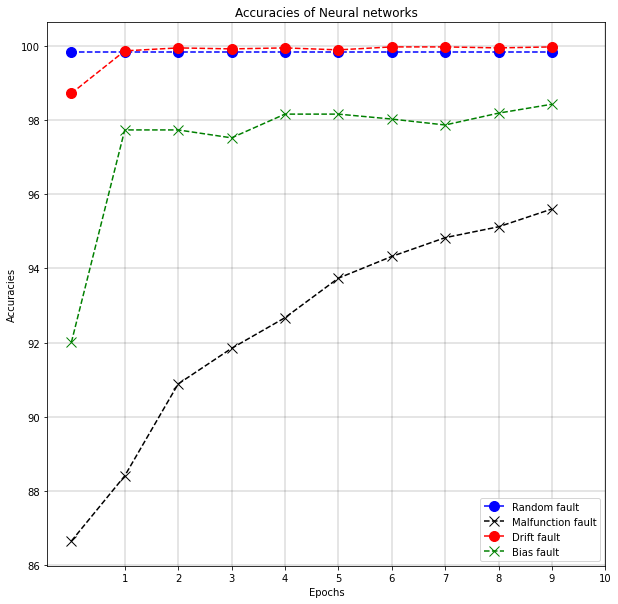

In [110]:
#graph for accuracy as per separate faults
pyplot.figure(figsize= (10, 10))
pyplot.plot(label_acc1, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
pyplot.plot(label_acc2,color='black', linestyle='dashed', marker='x', markerfacecolor='black', markersize=10)
pyplot.plot(label_acc3, color='red', linestyle= 'dashed', marker='o', markerfacecolor='red', markersize=10)
pyplot.plot(label_acc4,color='green', linestyle='dashed', marker='x', markerfacecolor='green', markersize=10)

pyplot.title("Accuracies of Neural networks")
pyplot.legend(['Random fault','Malfunction fault','Drift fault','Bias fault'])
pyplot.xlabel("Epochs")
pyplot.ylabel("Accuracies")
epochs = [1,2,3,4,5,6,7,8,9,10]
pyplot.xticks(epochs)
pyplot.grid(color='black', linestyle='-', linewidth=0.2)
pyplot.show()

## Comparision plot for all Supervised and Neural Network Algorithms

In [111]:
var_acc_RNN5
name_RNN5 = []
RNN_acc = []
RNN_acc.append(var_acc_RNN5)
name_RNN5.append('RNN')
df1 = pd.DataFrame(name_RNN5)
df2 = pd.DataFrame(RNN_acc)


df1['Accuracy'] = df2
df1.rename(columns={ 0: 'Algorithm'
                   ,}, 
                 inplace=True)

print(df1)


  Algorithm   Accuracy
0       RNN  92.750531


In [112]:
result_df
var_df = name_df

name_df1 = name_df.append(df1)
name_df2 = name_df1.reset_index(drop=True)
name_df2 

,Algorithm,Accuracy
0,SVM,61.833689
1,RandomForestClassifier,84.008529
2,XGBoost,79.930704
3,GradientBoostingClassifier,78.065032
4,KNN,84.275053
5,DecisionTreeClassifier,84.168443
6,RNN,92.750531


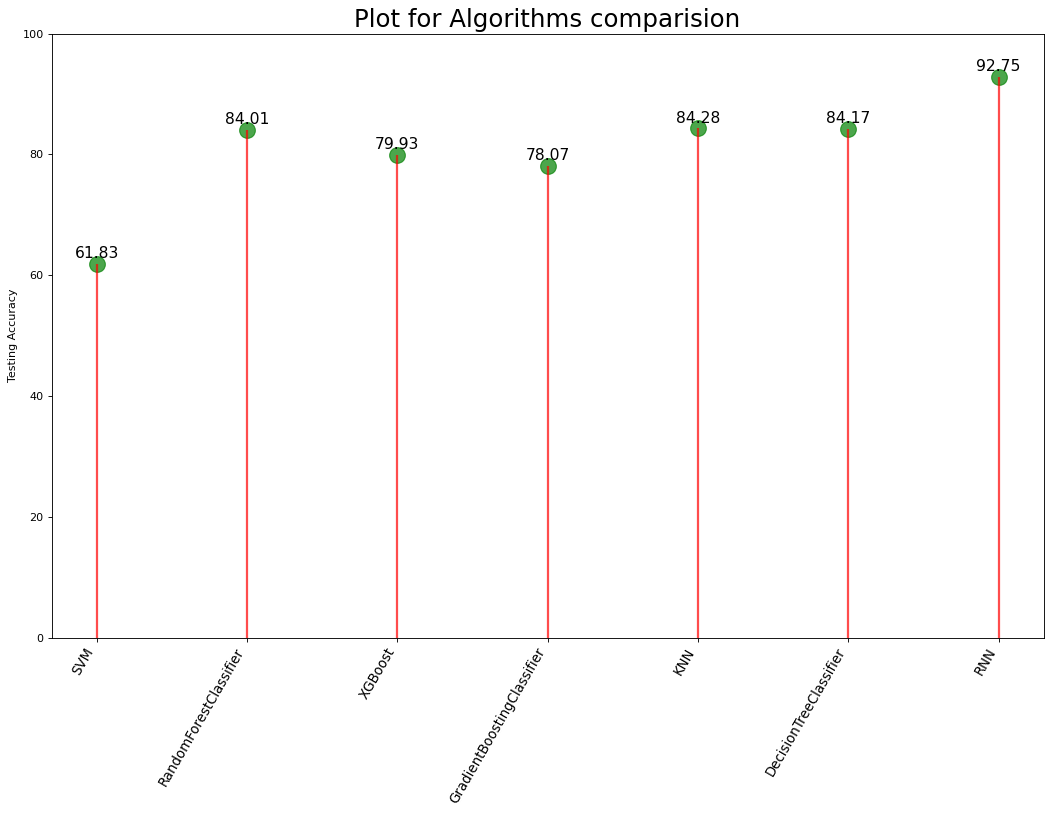

In [113]:
# Draw plot

fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=name_df2.index, ymin=0, ymax= name_df2.Accuracy, color='red', alpha=0.7, linewidth=2)
ax.scatter(x=name_df2.index, y=name_df2.Accuracy, s=200, color='green', alpha=0.7)


# Title, Label, Ticks and Ylim
ax.set_title('Plot for Algorithms comparision', fontdict={'size':22})
ax.set_ylabel('Testing Accuracy')
ax.set_xticks(name_df2.index)
ax.set_xticklabels(name_df2.Algorithm, rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 100)

# Annotate
for row in name_df2.itertuples():
    ax.text(row.Index, row.Accuracy+.5, s=round(row.Accuracy, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show()